# IMECA's Miguel

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.simplefilter("ignore")

plt.style.use('bmh')

In [2]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

def smape(y_true,y_pred):
    return ((y_true - y_pred).abs() / (y_true.abs() + y_pred.abs())).mean() * 200

### Leyendo CSV de IMECA's

In [3]:
miguel_imeca = pd.read_csv("../data_aircdmx/imeca_pm_2019.csv")
miguel_imeca.head(100)

,date,id_station,id_parameter,value,unit
0,01/01/2019,ACO,PM10,106,2
1,01/01/2019,AJU,PM2.5,15,2
2,01/01/2019,ATI,PM10,70,2
3,01/01/2019,CAM,PM10,91,2
4,01/01/2019,CAM,PM2.5,68,2
5,01/01/2019,MON,PM2.5,60,2
6,01/01/2019,CHO,PM10,110,2
7,01/01/2019,CUA,PM10,70,2
8,01/01/2019,CUT,PM10,109,2
9,01/01/2019,FAC,PM10,65,2


In [4]:
miguel_imeca.columns

Index(['\tdate', 'id_station', 'id_parameter', 'value', 'unit'], dtype='object')

In [5]:
miguel_imeca['date']=pd.to_datetime(miguel_imeca['\tdate'],format='%d/%m/%Y')

In [6]:
miguel_imeca = miguel_imeca[(miguel_imeca.id_station == 'MGH') & (miguel_imeca.id_parameter == 'PM10')]
miguel_imeca.head(6)

,date,id_station,id_parameter,value,unit,date
30,01/01/2019,MGH,PM10,85,2,2019-01-01
67,02/01/2019,MGH,PM10,55,2,2019-01-02
105,03/01/2019,MGH,PM10,53,2,2019-01-03
145,04/01/2019,MGH,PM10,58,2,2019-01-04
181,05/01/2019,MGH,PM10,56,2,2019-01-05
221,06/01/2019,MGH,PM10,43,2,2019-01-06


In [7]:
miguel_imeca.isnull().sum()

\tdate          0
id_station      0
id_parameter    0
value           0
unit            0
date            0
dtype: int64

In [8]:
miguel_imeca=miguel_imeca.set_index("date")

In [9]:
miguel_imeca.head()

,date,id_station,id_parameter,value,unit
date,,,,,
2019-01-01,01/01/2019,MGH,PM10,85,2
2019-01-02,02/01/2019,MGH,PM10,55,2
2019-01-03,03/01/2019,MGH,PM10,53,2
2019-01-04,04/01/2019,MGH,PM10,58,2
2019-01-05,05/01/2019,MGH,PM10,56,2


## Ejecución del modelo y conversión a IMECA

In [10]:
miguel_clean = pd.read_csv("../data_clean/miguel_pm10_clean_v2.csv",index_col=[1])
miguel_clean.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
miguel_modelo= miguel_clean.drop(["FECHA","HORA"],axis=1)

split_date2='2019-01-01'
split_date1='2015-06-01'

train=miguel_modelo[(miguel_modelo.index>=split_date1)&(miguel_modelo.index<split_date2)].copy()
test=miguel_modelo[miguel_modelo.index>split_date2].copy()

#### Preparando para fbprophet

In [12]:
train=train.reset_index().rename(columns={'DATETIME':'ds','MGH':'y'})
test=test.reset_index().rename(columns={'DATETIME':'ds','MGH':'y'})

train.ds=pd.to_datetime(train.ds)
test.ds=pd.to_datetime(test.ds)

In [13]:
modelo=Prophet(#n_changepoints=15,
               changepoints=['2016-01-01','2017-02-01','2018-01-01','2018-12-31'],
               changepoint_prior_scale=0.5
               #yearly_seasonality=True,
               #seasonality_prior_scale =15
               #seasonality_mode='multiplicative'
              ).fit(train)

In [14]:
pred=modelo.predict(test)

In [15]:
mape(test.y, pred.yhat), smape(test.y, pred.yhat)

(40.329344754738756, 33.092795733635725)

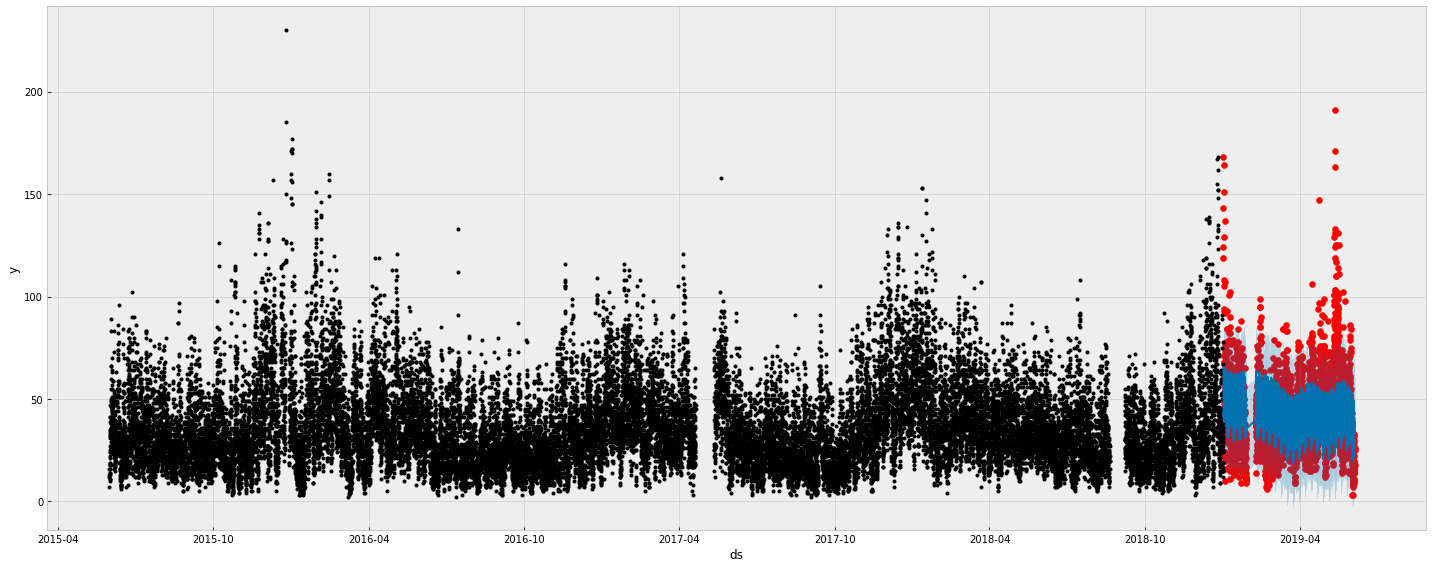

In [16]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

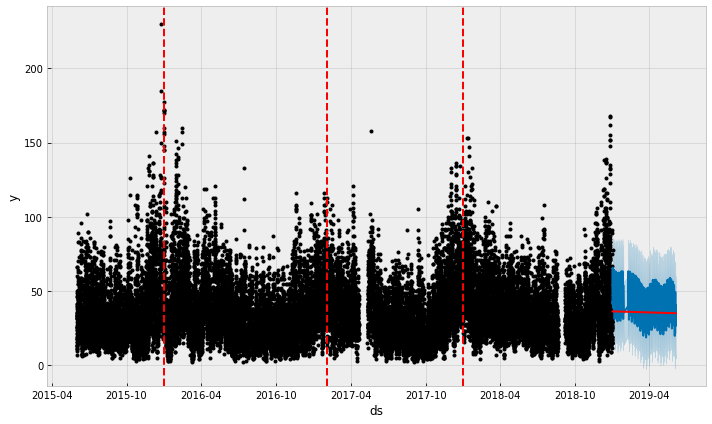

In [17]:
from fbprophet.plot import add_changepoints_to_plot
#ploteando change_pints del modelo
fig = modelo.plot(pred)
a = add_changepoints_to_plot(fig.gca(), modelo, pred)

# Predicción hacia IMECA

In [18]:
# ref: http://www.aire.cdmx.gob.mx/default.php?opc=%27ZaBhnmI=&dc=%27aQ
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,36.372639,22.257464,64.047115,36.372639,36.372639,6.412110,6.412110,6.412110,-8.848837,...,2.846947,2.846947,2.846947,12.414000,12.414000,12.414000,0.0,0.0,0.0,42.784749
1,2019-01-01 01:00:00,36.372303,21.014958,60.961194,36.372303,36.372303,5.516509,5.516509,5.516509,-9.780630,...,2.897427,2.897427,2.897427,12.399712,12.399712,12.399712,0.0,0.0,0.0,41.888812
2,2019-01-01 02:00:00,36.371967,20.506482,61.813491,36.371967,36.371967,4.906584,4.906584,4.906584,-10.405471,...,2.926655,2.926655,2.926655,12.385399,12.385399,12.385399,0.0,0.0,0.0,41.278551
3,2019-01-01 03:00:00,36.371631,22.255264,61.449990,36.371631,36.371631,4.874403,4.874403,4.874403,-10.432149,...,2.935488,2.935488,2.935488,12.371064,12.371064,12.371064,0.0,0.0,0.0,41.246034
4,2019-01-01 04:00:00,36.371294,21.846070,61.390952,36.371294,36.371294,5.641465,5.641465,5.641465,-9.640187,...,2.924946,2.924946,2.924946,12.356706,12.356706,12.356706,0.0,0.0,0.0,42.012760


In [19]:
df_pred=pd.DataFrame(pred[['ds','yhat']])
df_pred=df_pred.set_index('ds')
#df_pred=df_pred.groupby(pd.Grouper(key='ds', freq="D")).max()
#df_pred=df_pred.groupby(pd.TimeGrouper('D')).mean()

In [20]:
df_pred_mean=df_pred.groupby(pd.TimeGrouper('D')).mean()
df_pred_max=df_pred.groupby(pd.TimeGrouper('D')).max()

In [21]:
df_pred_mean.shape

(155, 1)

In [22]:
df_pred_mean.head()

,yhat
ds,
2019-01-01,50.827359
2019-01-02,49.133369
2019-01-03,49.611658
2019-01-04,49.321154
2019-01-05,45.881196


In [23]:
df_pred_mean.isnull().sum() #13 NANs
df_pred_mean=df_pred_mean.dropna()
#df_pred.head()

In [28]:
df_pred_mean.shape

(142, 1)

### Cálculo IMECA

In [32]:
def imeca_calculation(a):
    imeca = []
    for e in a:
        e=round(e)
        if (e>0)&(e<=40):
            k= (50-0)/(40-0)
            im=k*(e-0) + 0
            imeca.append(round(im))

        elif (e>=41) & (e<=75):
            k=(100-51)/(75-41)
            im=k*(e-41) + 51
            imeca.append(round(im))

        elif (e>=76) & (e<=214):
            k=(150-101)/(214-76)
            im=k*(e-76) + 101
            imeca.append(round(im))

        elif (e>=215) & (e<=354):
            k=(200-151)/(354-215)
            im=k*(e-215) + 151
            imeca.append(round(im))

        elif (e>=355) & (e<=424):
            k=(300-201)/(424-355)
            im=k*(e-355) + 201
            imeca.append(round(im))

    return imeca

In [34]:
imeca_calculation(df_pred_mean.yhat)

[65,
 63,
 64,
 63,
 58,
 51,
 60,
 61,
 60,
 61,
 60,
 55,
 50,
 57,
 57,
 58,
 60,
 60,
 57,
 50,
 58,
 63,
 60,
 61,
 63,
 57,
 49,
 63,
 57,
 51,
 58,
 61,
 60,
 63,
 55,
 50,
 55,
 60,
 57,
 57,
 58,
 54,
 48,
 55,
 58,
 55,
 57,
 55,
 49,
 45,
 52,
 54,
 52,
 52,
 50,
 49,
 41,
 44,
 50,
 48,
 49,
 48,
 44,
 38,
 44,
 46,
 45,
 45,
 42,
 41,
 36,
 42,
 46,
 45,
 46,
 48,
 41,
 39,
 46,
 50,
 49,
 50,
 48,
 42,
 50,
 54,
 49,
 54,
 54,
 50,
 45,
 51,
 54,
 51,
 52,
 52,
 48,
 42,
 45,
 51,
 49,
 49,
 49,
 45,
 39,
 46,
 49,
 46,
 48,
 48,
 44,
 39,
 46,
 50,
 49,
 51,
 50,
 48,
 42,
 50,
 54,
 52,
 54,
 54,
 50,
 45,
 52,
 55,
 54,
 54,
 52,
 50,
 44,
 50,
 51,
 49,
 50,
 49,
 44,
 38,
 44,
 39]

In [35]:
df_pred_mean['imeca_pred']=imeca_calculation(df_pred_mean.yhat)
df_pred_mean.head()

,yhat,imeca_pred
ds,,
2019-01-01,50.827359,65
2019-01-02,49.133369,63
2019-01-03,49.611658,64
2019-01-04,49.321154,63
2019-01-05,45.881196,58


In [37]:
miguel_imeca['imeca']=imeca_calculation(miguel_imeca.value)

In [38]:
df_comparison=df_pred_mean.join(miguel_imeca)[['yhat','imeca_pred','imeca']]
df_comparison=df_comparison.dropna()

In [39]:
df_comparison.head()

,yhat,imeca_pred,imeca
ds,,,
2019-01-01,50.827359,65,104.0
2019-01-02,49.133369,63,71.0
2019-01-03,49.611658,64,68.0
2019-01-04,49.321154,63,76.0
2019-01-05,45.881196,58,73.0


### Categorizando IMECA

In [40]:
def categorizando(df):
    lst=[]
    for e in df:
        if (e>=0) & (e<50):
            lst.append('Buena')
        elif (e>=50) & (e<100):
            lst.append('Regular')
        elif (e>=100) & (e<150):
            lst.append('Mala')
        elif (e>=150) & (e<200):
            lst.append('Muy mala')
        else:
            lst.append('Ya vete de aquí woe')
    return lst

In [41]:
df_comparison['categoria_pred']=categorizando(df_comparison.imeca_pred)
df_comparison['categoria_value']=categorizando(df_comparison.imeca)
df_comparison.head()

,yhat,imeca_pred,imeca,categoria_pred,categoria_value
ds,,,,,
2019-01-01,50.827359,65,104.0,Regular,Mala
2019-01-02,49.133369,63,71.0,Regular,Regular
2019-01-03,49.611658,64,68.0,Regular,Regular
2019-01-04,49.321154,63,76.0,Regular,Regular
2019-01-05,45.881196,58,73.0,Regular,Regular


In [42]:
def comparando_categorias(a,b):
    lst=[]
    for e in range(len(a)):
        if a[e] == b[e]:
            lst.append(1)
        else:
            lst.append(0)
    return lst

In [43]:
df_comparison['comparacion_imecas']=comparando_categorias(df_comparison.categoria_pred,df_comparison.categoria_value)
df_comparison.head(10)

,yhat,imeca_pred,imeca,categoria_pred,categoria_value,comparacion_imecas
ds,,,,,,
2019-01-01,50.827359,65,104.0,Regular,Mala,0
2019-01-02,49.133369,63,71.0,Regular,Regular,1
2019-01-03,49.611658,64,68.0,Regular,Regular,1
2019-01-04,49.321154,63,76.0,Regular,Regular,1
2019-01-05,45.881196,58,73.0,Regular,Regular,1
2019-01-06,41.469000,51,54.0,Regular,Regular,1
2019-01-07,46.616338,60,63.0,Regular,Regular,1
2019-01-08,48.463717,61,63.0,Regular,Regular,1
2019-01-09,46.880371,60,55.0,Regular,Regular,1


In [44]:
df_comparison.comparacion_imecas.value_counts()

1    70
0    66
Name: comparacion_imecas, dtype: int64